## Capstone Project : Mahindra First Choice


### Problem Statement
Mahindra First Choice Services (MFCS) is a company of Mahindra Group and is India’s leading chain of multi-brand car workshops with over 335+ workshops present in 267+ towns & 24 states. It has serviced over 10,50,000 cars. The company aims to establish countrywide network of over 400 workshops by March 2018.
Mahindra would now like to leverage the data that they have and address the key issues they have. Read along to know how you can help them improve their business.
The dataset consist of three aspects:
* Customer data: where the details of the customer like the car owned, state and place of residence, order type, etc are present. Data dimension is of 534000 Customer entries
* Invoice data: where information related to customer visits and transactions are recorded, whether a customer as insurance claims, bifurcation of the amount 
 paid, for what type of service did the customer came for, etc…
* Material Inventory: where information related to what kind of service did the customer took and what kind of material was used to service, Labor information and the cost for the service, Plant and plant name where the customer took the service.


### Objective

### Geolocation Based Customer Analysis:
The idea is to explore how various factors like car make & model, time and type of service etc. vary with location. Since the servicing industry is local in nature, this kind of an analysis could possibly render some really interesting business insights.
Furthermore, this analysis will enable us to formulate more concrete machine learning problems.
From the data at hand it is possible to extract insights about customer behaviour especially the following questions can be addressed

#### Problem Statement-1
Identifying the ownership pattern of cars throughout the country. This also captures the problem wherein information regarding the spending patterns can be identified Expected Business Outcome: Mahindra First Choice Services will be benefited in multiple ways. Knowing the ownership pattern targeted marketing campaigns could be carried out. Knowing the spending patterns services could be suited to the particular spending pattern.

#### Problem Statement-2
Identify the type of order each state receives and present it as an interactive visualization. Expected Business Outcome: This could potentially give information about how Mahindra First Choice needs to be prepared to tackle various seasonal cases

### Market Segmentation:
Market segmentation is the process of dividing a market of potential customers into internally homogeneous and mutually heterogeneous groups or segments, based on different characteristics captured in the data. Groups created through such a segmentation exercise many times reveal behavioral patterns which are different from generally accepted segments by the business. The exercise is broadly known as “clustering” and is aimed at finding the consumers who will respond similarly to various stimuli by detecting underlying behavior patterns.
Though clustering falls under a Machine Learning problem category called unsupervised learning, which requires extensive efforts, it is possible to carry out a visual analysis in a relatively short timespan.

#### Problem Statement: 
Customer Lifetime value prediction - Based on Customer segments, predict the revenue that can be extracted from each segment over a life of the car -Regression/Time Series.


## Start of Notebook

#### Why are we doing this
- To Help Mahindra improve its business from analysing the data given like max. car model coming for repair location-wise, top sales garage etc
- To Identify more profitable area or expansion in other regions

#### Stakeholders:
- Marketing Head of Mahindra First [For Marketing Campaign]
- Operational Head/State Head of Mahindra First [For knowing In-Outs operation in Garage]
- Project Manager [i.e. Our Consulting Firm Manager - To which Mahindra First Company are first point of contact with for Analysis]

## Start of Notebook

## Table Of Contents

### 1. <a href="#Importing-Libraries">Libraries Imported </a> 
### 2. <a href="#Import-DataSet">Import DataSet </a>
### 3. <a href="#Train-Test-Split">Train Test Split </a> 
### 4.  <a href="#Machine-Learning-Algorithm"> Machine Learning Algorithms Prediction </a> 
   ### 4.1  <a href="#Linear-Regression"> Linear Regression </a> 
   ### 4.2  <a href="#Decision-Tree-Regressor"> Decision Tree Regressor </a> 
   ### 4.3  <a href="#Random-Forest-Regressor"> Random Forest Regressor </a> 
   ### 4.4  <a href="#XGB-Regressor"> XGB Regressor </a> 

### Importing Libraries

In [273]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import plotly
import plotly.graph_objects as go
import re
import pgeocode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor ,RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso

In [233]:
 # Some tweaks for displaying large rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [234]:
# If DataSet lies in another Directory
#os.getcwd()
os.chdir("C:\\Users\\Dashang\\Documents\\GreyAtom_Capstone_MahindraFirst\\") 

In [235]:
def rmsle(actual_column, predicted_column):
    assert len(actual_column) == len(predicted_column)
    sum=0.0
    for x,y in zip(actual_column, predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

## Import DataSet

In [236]:
df = pd.read_csv("invoice_final.csv")   ## Pre-Cleaned DataSet

In [237]:
df.head()

,model,customer_type,customer_no,gate_pass_time,invoice_no,job_card_no,km_reading,labour_total,make,order_type,pin_code,plant_code,plant_name,regn_no,total_amt,user_id,pin_city,pin_district,pin_location,latitude,longitude,state,zones,invoice_datetime,jobcard_datetime,Service_Time,model_type
0,spark,retail,67849,0:00:00,7005200002,168303,49317,1203.14,general motors,paid service,400601,bc01,thane,ka19ma1291,4051.95,bc01fs1,Thane,Maharashtra,"Thane Bazar, Thane H.O, Thane R.S.",19.1941,73.0002,maharashtra,west zone,01/02/15 11:30,12/13/2014 14:29,19 days 21:00:53.000000000,hatchback
1,indica,retail,84419,0:00:00,7005200003,173997,78584,804.26,tata motors,smc value package,400603,bc01,thane,mh43r3046,1001.29,bc01sa2,Thane,Maharashtra,"Thane East, Kopri Colony",19.1941,73.0002,maharashtra,west zone,01/03/15 10:07,01/02/15 14:12,0 days 19:55:14.000000000,hatchback
2,zen,retail,81055,0:00:00,7005200004,173889,33985,180.19,maruti suzuki,running repairs,400607,bc01,thane,ap09ax0582,233.14,bc01sa2,Thane,Maharashtra,"Chitalsar Manpada, Sandozbaugh",19.1941,73.0002,maharashtra,west zone,01/03/15 11:12,01/02/15 11:40,0 days 23:32:13.000000000,hatchback
3,indica,retail,84419,0:00:00,7005200005,174158,78584,0.00,tata motors,smc redemption,400603,bc01,thane,mh43r3046,0.00,bc01sa2,Thane,Maharashtra,"Thane East, Kopri Colony",19.1941,73.0002,maharashtra,west zone,01/03/15 11:40,01/03/15 10:12,0 days 01:28:12.000000000,hatchback
4,santro xing,retail,18980,0:00:00,7005200006,173860,50057,1202.97,hyundai,paid service,400603,bc01,thane,mh04cd9768,2747.12,bc01sa2,Thane,Maharashtra,"Thane East, Kopri Colony",19.1941,73.0002,maharashtra,west zone,01/03/15 12:07,01/02/15 10:45,1 days 01:21:35.000000000,hatchback


###  Considering LTV as per yearly basis , since 2015 year data is appropriate with Data Cleaning Strategies . Filtering 2015 data since it is appropriate

In [238]:
df["invoice_datetime"] = pd.to_datetime(df["invoice_datetime"],dayfirst=True)

In [239]:
df["invoice_datetime"] = pd.to_datetime(df["invoice_datetime"],dayfirst=True)
df["jobcard_datetime"] = pd.to_datetime(df["jobcard_datetime"],dayfirst=True)
df['Service_Time']     = abs(df['invoice_datetime'] - df['jobcard_datetime'])
df['service_time_hrs'] = df['Service_Time']/np.timedelta64(1,'h')

In [240]:
df['year'] = df['invoice_datetime'].dt.year

In [241]:
df.head()

,model,customer_type,customer_no,gate_pass_time,invoice_no,job_card_no,km_reading,labour_total,make,order_type,pin_code,plant_code,plant_name,regn_no,total_amt,user_id,pin_city,pin_district,pin_location,latitude,longitude,state,zones,invoice_datetime,jobcard_datetime,Service_Time,model_type,service_time_hrs,year
0,spark,retail,67849,0:00:00,7005200002,168303,49317,1203.14,general motors,paid service,400601,bc01,thane,ka19ma1291,4051.95,bc01fs1,Thane,Maharashtra,"Thane Bazar, Thane H.O, Thane R.S.",19.1941,73.0002,maharashtra,west zone,2015-02-01 11:30:00,2014-12-13 14:29:00,49 days 21:01:00,hatchback,1197.016667,2015
1,indica,retail,84419,0:00:00,7005200003,173997,78584,804.26,tata motors,smc value package,400603,bc01,thane,mh43r3046,1001.29,bc01sa2,Thane,Maharashtra,"Thane East, Kopri Colony",19.1941,73.0002,maharashtra,west zone,2015-03-01 10:07:00,2015-02-01 14:12:00,27 days 19:55:00,hatchback,667.916667,2015
2,zen,retail,81055,0:00:00,7005200004,173889,33985,180.19,maruti suzuki,running repairs,400607,bc01,thane,ap09ax0582,233.14,bc01sa2,Thane,Maharashtra,"Chitalsar Manpada, Sandozbaugh",19.1941,73.0002,maharashtra,west zone,2015-03-01 11:12:00,2015-02-01 11:40:00,27 days 23:32:00,hatchback,671.533333,2015
3,indica,retail,84419,0:00:00,7005200005,174158,78584,0.00,tata motors,smc redemption,400603,bc01,thane,mh43r3046,0.00,bc01sa2,Thane,Maharashtra,"Thane East, Kopri Colony",19.1941,73.0002,maharashtra,west zone,2015-03-01 11:40:00,2015-03-01 10:12:00,0 days 01:28:00,hatchback,1.466667,2015
4,santro xing,retail,18980,0:00:00,7005200006,173860,50057,1202.97,hyundai,paid service,400603,bc01,thane,mh04cd9768,2747.12,bc01sa2,Thane,Maharashtra,"Thane East, Kopri Colony",19.1941,73.0002,maharashtra,west zone,2015-03-01 12:07:00,2015-02-01 10:45:00,28 days 01:22:00,hatchback,673.366667,2015


In [242]:
filtered_df_2015= df[df['year']==2015]

In [243]:
filtered_df_2015.shape

(124719, 29)

In [244]:
filtered_df_2015.head()

,model,customer_type,customer_no,gate_pass_time,invoice_no,job_card_no,km_reading,labour_total,make,order_type,pin_code,plant_code,plant_name,regn_no,total_amt,user_id,pin_city,pin_district,pin_location,latitude,longitude,state,zones,invoice_datetime,jobcard_datetime,Service_Time,model_type,service_time_hrs,year
0,spark,retail,67849,0:00:00,7005200002,168303,49317,1203.14,general motors,paid service,400601,bc01,thane,ka19ma1291,4051.95,bc01fs1,Thane,Maharashtra,"Thane Bazar, Thane H.O, Thane R.S.",19.1941,73.0002,maharashtra,west zone,2015-02-01 11:30:00,2014-12-13 14:29:00,49 days 21:01:00,hatchback,1197.016667,2015
1,indica,retail,84419,0:00:00,7005200003,173997,78584,804.26,tata motors,smc value package,400603,bc01,thane,mh43r3046,1001.29,bc01sa2,Thane,Maharashtra,"Thane East, Kopri Colony",19.1941,73.0002,maharashtra,west zone,2015-03-01 10:07:00,2015-02-01 14:12:00,27 days 19:55:00,hatchback,667.916667,2015
2,zen,retail,81055,0:00:00,7005200004,173889,33985,180.19,maruti suzuki,running repairs,400607,bc01,thane,ap09ax0582,233.14,bc01sa2,Thane,Maharashtra,"Chitalsar Manpada, Sandozbaugh",19.1941,73.0002,maharashtra,west zone,2015-03-01 11:12:00,2015-02-01 11:40:00,27 days 23:32:00,hatchback,671.533333,2015
3,indica,retail,84419,0:00:00,7005200005,174158,78584,0.00,tata motors,smc redemption,400603,bc01,thane,mh43r3046,0.00,bc01sa2,Thane,Maharashtra,"Thane East, Kopri Colony",19.1941,73.0002,maharashtra,west zone,2015-03-01 11:40:00,2015-03-01 10:12:00,0 days 01:28:00,hatchback,1.466667,2015
4,santro xing,retail,18980,0:00:00,7005200006,173860,50057,1202.97,hyundai,paid service,400603,bc01,thane,mh04cd9768,2747.12,bc01sa2,Thane,Maharashtra,"Thane East, Kopri Colony",19.1941,73.0002,maharashtra,west zone,2015-03-01 12:07:00,2015-02-01 10:45:00,28 days 01:22:00,hatchback,673.366667,2015


In [147]:
filtered_df_2015.dtypes

model                        object
customer_type                object
customer_no                  object
gate_pass_time               object
invoice_no                    int64
job_card_no                   int64
km_reading                    int64
labour_total                float64
make                         object
order_type                   object
pin_code                      int64
plant_code                   object
plant_name                   object
regn_no                      object
total_amt                   float64
user_id                      object
pin_city                     object
pin_district                 object
pin_location                 object
latitude                    float64
longitude                   float64
state                        object
zones                        object
invoice_datetime     datetime64[ns]
jobcard_datetime     datetime64[ns]
Service_Time        timedelta64[ns]
model_type                   object
service_time_hrs            

grpd = filtered_df_2015.groupby(['model_type','customer_no','order_type','km_reading','customer_type','make','state']).agg({'total_amt':'sum','service_time_hrs':'sum'}).reset_index()

In [248]:
grpd = filtered_df_2015.groupby(['customer_no','customer_type','make','model','state','year']).agg({'invoice_no':'nunique','total_amt':'mean'}).reset_index()

#Experimental
grpd = filtered_df_2015.groupby(['model_type','latitude','longitude','customer_type','make','state']).agg({'total_amt':'sum'}).reset_index()

In [249]:
grpd.head()

,customer_no,customer_type,make,model,state,year,invoice_no,total_amt
0,10000,retail,maruti suzuki,wagonr,telangana,2015,1,185.96
1,100000,retail,hyundai,accent,gujarat,2015,1,6026.05
2,100001,retail,mahindra & mahindra,bolero,maharashtra,2015,1,697.59
3,100001,retail,skoda,superb,maharashtra,2015,1,1058.44
4,100001,retail,toyota,innova,maharashtra,2015,1,2507.72


In [250]:
grpd['cust_val']=grpd['invoice_no']*grpd['total_amt']

In [251]:
grpd.head()

,customer_no,customer_type,make,model,state,year,invoice_no,total_amt,cust_val
0,10000,retail,maruti suzuki,wagonr,telangana,2015,1,185.96,185.96
1,100000,retail,hyundai,accent,gujarat,2015,1,6026.05,6026.05
2,100001,retail,mahindra & mahindra,bolero,maharashtra,2015,1,697.59,697.59
3,100001,retail,skoda,superb,maharashtra,2015,1,1058.44,1058.44
4,100001,retail,toyota,innova,maharashtra,2015,1,2507.72,2507.72


In [252]:
new_df = grpd[['customer_no','customer_type','make','state','invoice_no','total_amt','cust_val']]

In [253]:
after_dummy = pd.get_dummies(data=new_df, columns=['customer_type','make','state'])

In [254]:
df2 = pd.DataFrame(after_dummy)

In [255]:
model_df = df2.drop('customer_no',axis=1)

In [256]:
model_df.head()

,invoice_no,total_amt,cust_val,customer_type_corporate others,customer_type_corporate- m&m,customer_type_fleets,customer_type_insurance,customer_type_mfcwl,customer_type_retail,make_audi,make_bmw,make_daewoo,make_fiat,make_force,make_ford,make_general motors,make_hindustan motors,make_honda,make_hyundai,make_jeep,make_land rover,make_mahindra & mahindra,make_maruti suzuki,make_mercedes benz,make_mitsubishi motors,make_nissan,make_porche,make_premier¬†automobiles,make_renault,make_skoda,make_sonalika,make_tata motors,make_toyota,make_volkswagen,make_volvo,state_andhra pradesh,state_bihar,state_chandigarh,state_chattisgarh,state_dadra and nagar haveli and daman and diu,state_delhi,state_goa,state_gujarat,state_haryana,state_himachal pradesh,state_jammu & kashmir,state_jharkhand,state_karnataka,state_kerala,state_lakshadweep,state_madhya pradesh,state_maharashtra,state_pondicherry,state_punjab,state_rajasthan,state_tamil nadu,state_telangana,state_uttar pradesh,state_uttarakhand,state_west bengal
0,1,185.96,185.96,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,6026.05,6026.05,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,697.59,697.59,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,1058.44,1058.44,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,2507.72,2507.72,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [257]:
#Train Test Split 
X=model_df.drop('cust_val',axis=1)
y=model_df['cust_val']

## Machine Learning Algorithm

### Linear Regressor

In [259]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)


In [260]:
print('Train RMSE:',np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,lr.predict(X_test))))

Train RMSE: 9351.818557464938
Test RMSE: 8056.774393650788


In [269]:
#Evaluation metric  R2 score
R2_Score=r2_score(y_train,lr.predict(X_train))
print('R2 score:',R2_Score)
print('=='*10)

R2 score: 0.7494809084031782


In [265]:
#Evaluation metric  R2 score
R2_Score=r2_score(y_test,lr.predict(X_test))
print('R2 score:',R2_Score)
print('=='*10)

R2 score: 0.752689856224446


### Decision Tree Regressor

Text(0.5, 1.0, 'accuracy vs max_depth')

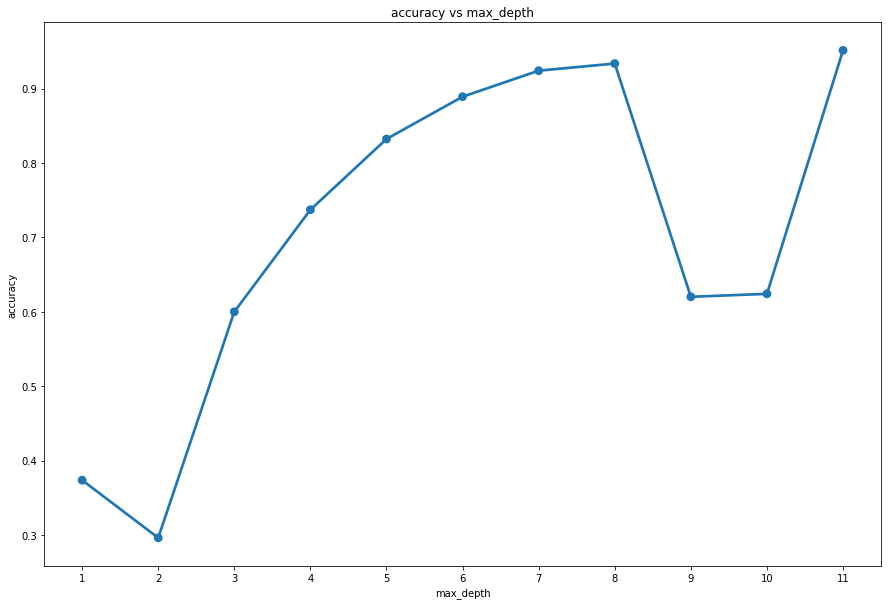

In [261]:
#Finding the Optimal Value For Max Depth
max_depth_range = list(range(1,12))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    reg = DecisionTreeRegressor(max_depth = depth, random_state = 18)
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    accuracy.append(score)
    
x=max_depth_range
y=accuracy

plt.figure(figsize=(15,10))
sns.pointplot(x,y)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('accuracy vs max_depth')

In [271]:
plt.savefig('DTdepthplot.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [266]:
dt_reg = DecisionTreeRegressor(max_depth=7, random_state = 18)
dt_reg.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=7, random_state=18)

In [267]:
y_pred=dt_reg.predict(X_test)
#Evaluation metric
mse =mean_squared_error(y_test,y_pred)
print('mse score:',mse)
print('=='*10)
rmse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(rmse)
print('Rmse score:',rmse)

#accuracy score on train data
train_score=dt_reg.score(X_train,y_train)
print('train score:',train_score)
print('=='*10)

#accuracy score on test data
test_score=dt_reg.score(X_test,y_test)
print('test score:',test_score)
print('=='*10)

mse score: 19959471.597905353
Rmse score: 4467.602444030283
train score: 0.9778476534226113
test score: 0.9239553676991554


In [268]:
#Evaluation metric  R2 score
R2_Score=r2_score(y_test,y_pred)
print('R2 score:',R2_Score)
print('=='*100)

R2 score: 0.9239553676991554


In [272]:
#Evaluation metric  R2 score
R2_Score=r2_score(y_train,dt_reg.predict(X_train))
print('R2 score:',R2_Score)
print('=='*10)

R2 score: 0.9778476534226113


In [230]:
print('Train RMSE:',np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(dt_reg.predict(X_train)))))
print('Test RMSE:',np.sqrt(mean_squared_error(np.expm1(y_test),np.expm1(dt_reg.predict(X_test)))))

Train RMSE: 11439.256477904997
Test RMSE: 11714.78809033347


### Random Forest Regressor

In [276]:
rf=RandomForestRegressor(random_state=10)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_y_pred_train = rf.predict(X_train)

In [277]:
#Evaluation metric  R2 score
R2_Score=r2_score(y_train,rf.predict(X_train))
print('RF TRAIN R2 score:',R2_Score)
print('=='*10)

#Evaluation metric  R2 score
R2_Score=r2_score(y_test,rf.predict(X_test))
print('RF TEST R2 score:',R2_Score)
print('=='*10)


RF TRAIN R2 score: 0.9824741971959071
RF TEST R2 score: 0.9182652925607724


### XGB Regressor

In [278]:
xgb = XGBRegressor(random_state=10)
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)
xgb_y_pred_train = xgb.predict(X_train)

[22:48:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [280]:
#Evaluation metric  R2 score
R2_Score=r2_score(y_train,xgb.predict(X_train))
print('XGB TRAIN R2 score:',R2_Score)
print('=='*10)

#Evaluation metric  R2 score
R2_Score=r2_score(y_test,xgb.predict(X_test))
print('RF TEST R2 score:',R2_Score)
print('=='*10)


XGB TRAIN R2 score: 0.9874620472948354
RF TEST R2 score: 0.92640922024526
